## Introduction:

### In this notebook, I am going to be analysing the Zomato Bangalore Dataset which I got through Kaggle website.  The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. 

### Zomato is an Indian restaurant search and discovery service founded in 2008 by Deepinder Goyal and Pankaj Chaddah. It currently operates in 24 countries. It provides information and reviews of restaurants, including images of menus where the restaurant does not have its own website and also online delivery.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns


In [2]:
data= pd.read_csv('zomato.csv')

In [3]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
data=data.drop(['url', 'address','phone','menu_item','dish_liked', 'reviews_list'],axis=1)


In [5]:
data.shape

(51717, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [7]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [9]:
data.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
data['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [11]:
data.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [12]:
data=data.dropna()

In [13]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [14]:
data.shape

(43533, 11)

In [15]:
data.iloc[:,1:7]

,online_order,book_table,rate,votes,location,rest_type
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining
1,Yes,No,4.1/5,787,Banashankari,Casual Dining
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining"
3,No,No,3.7/5,88,Banashankari,Quick Bites
4,No,No,3.8/5,166,Basavanagudi,Casual Dining
...,...,...,...,...,...,...
51709,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar"
51711,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar"
51712,No,No,3.6 /5,27,Whitefield,Bar
51715,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar


### Creating a new column named "rate_new" which has '3.8' as value instead of '3.8/5'

In [16]:
data["rate"] = data['rate'].apply(lambda x: x.split("/")[0])

In [17]:
data["rate"]

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rate, Length: 43533, dtype: object

In [18]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [19]:
data['rate']=data['rate'].replace("-",'2.5')
data['rate']=data['rate'].replace("NEW",'2.5')

In [20]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [21]:
data['rate_new'] = data['rate'].str.replace(' ','') 

In [22]:
data['rate_new']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate_new, Length: 43533, dtype: object

In [23]:
data['rate_new'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

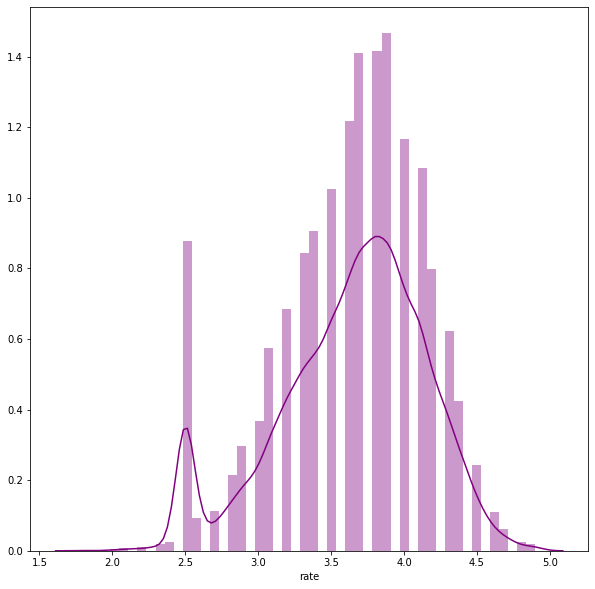

In [24]:
plt.figure(figsize = (10, 10))
sns.distplot(data['rate'], color = 'purple')

## Total number of different cuisines 

In [25]:
data["S"]=data["cuisines"].apply(lambda x : x.split(","))

In [26]:
data["S"]

0                      [North Indian,  Mughlai,  Chinese]
1                         [Chinese,  North Indian,  Thai]
2                              [Cafe,  Mexican,  Italian]
3                           [South Indian,  North Indian]
4                             [North Indian,  Rajasthani]
                               ...                       
51709                        [North Indian,  Continental]
51711    [Andhra,  South Indian,  Chinese,  North Indian]
51712                                       [Continental]
51715                                       [Finger Food]
51716          [Finger Food,  North Indian,  Continental]
Name: S, Length: 43533, dtype: object

In [27]:
print("all different cuisines:")
cuisines = set()
for i in data['cuisines']:
    for j in str(i).split(', '):
        cuisines.add(j)
cuisines

all different cuisines:


{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Australian',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'Drinks Only',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mongolian',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Paan',
 'Pan Asian',
 'Parsi',
 'Pizz

In [28]:
len=0
for i in cuisines:
    len+=1
len

106

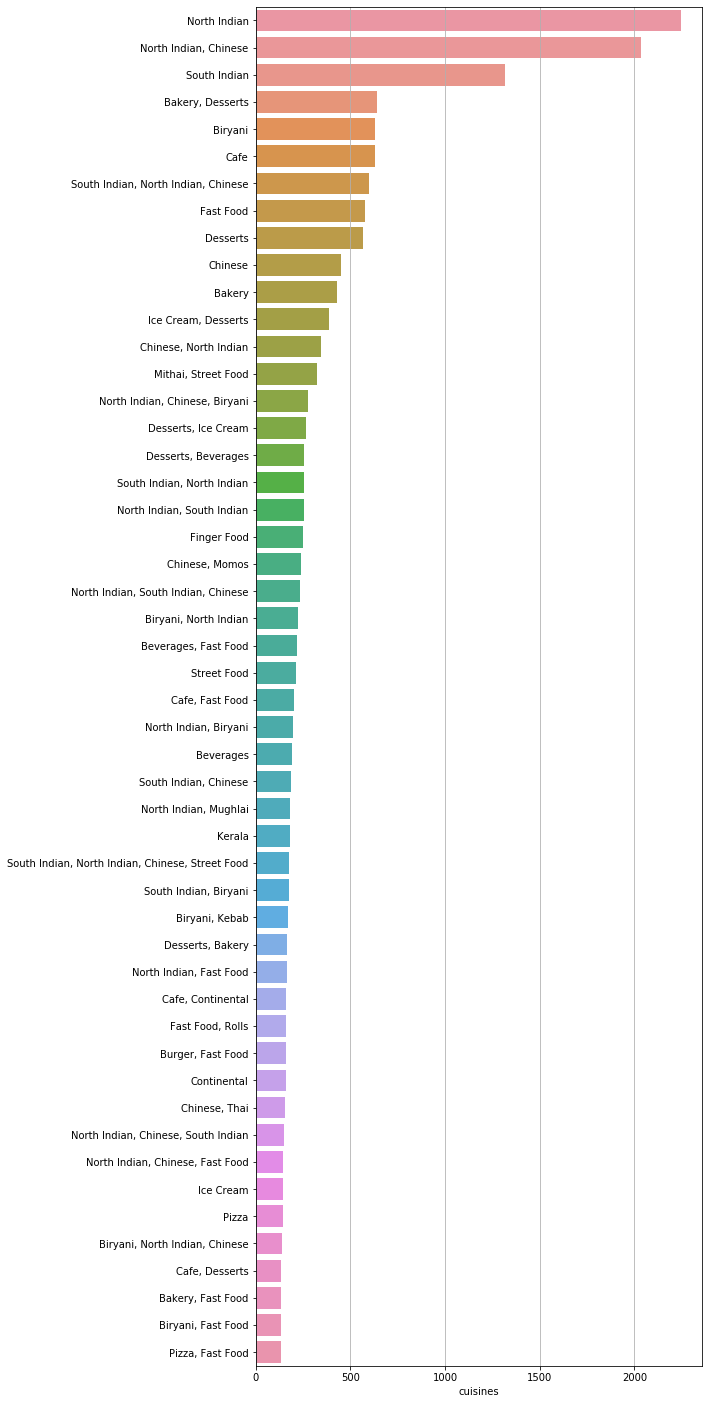

In [29]:
cu = data['cuisines'].value_counts()[:50]
plt.figure(figsize=(8,25))
plt.grid(True)
sns.barplot(cu,cu.index)

### Hotels offering "North Indian" as one of their cuisines

In [30]:
NIFoodRestaurants = data[data['cuisines'].str.contains('North Indian',na=False)]
NIFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.1,"[North Indian, Mughlai, Chinese]"
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,4.1,"[Chinese, North Indian, Thai]"
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.7,"[South Indian, North Indian]"
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.8,"[North Indian, Rajasthani]"
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari,3.8,[North Indian]


### Hotels offering "Tamil" as one of their cuisines

In [31]:
tamilrestaurants=data[data['cuisines'].str.contains('Tamil',na=False)]
tamilrestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S
1251,Bean D'er Cafe,Yes,No,3.5,8,JP Nagar,Quick Bites,"Tamil, Fast Food",250,Delivery,Bannerghatta Road,3.5,"[Tamil, Fast Food]"
3942,Curry Flavours,Yes,No,3.7,59,Sarjapur Road,Casual Dining,"Tamil, South Indian, North Indian, Chinese",200,Delivery,Bellandur,3.7,"[Tamil, South Indian, North Indian, Chinese]"
4667,Curry Flavours,No,No,2.5,0,Bellandur,Casual Dining,"Tamil, South Indian, North Indian, Chinese",200,Dine-out,Bellandur,2.5,"[Tamil, South Indian, North Indian, Chinese]"
13565,Hotel Sakti Saravana,Yes,No,3.8,67,Electronic City,Quick Bites,"Tamil, South Indian",350,Delivery,Electronic City,3.8,"[Tamil, South Indian]"
14284,Hotel Sakti Saravana,Yes,No,3.8,67,Electronic City,Quick Bites,"Tamil, South Indian",350,Dine-out,Electronic City,3.8,"[Tamil, South Indian]"


### Hotels offering "South Indian" as one of their cuisines

In [32]:
SIrestaurants=data[data['cuisines'].str.contains('South Indian',na=False)]
SIrestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.7,"[South Indian, North Indian]"
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari,3.6,"[North Indian, South Indian, Andhra, Chinese]"
26,Coffee Tindi,Yes,No,3.8,75,Banashankari,"Cafe, Quick Bites","Cafe, South Indian",200,Cafes,Banashankari,3.8,"[Cafe, South Indian]"
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"North Indian, Mughlai, South Indian, Chinese",750,Delivery,Banashankari,4.4,"[North Indian, Mughlai, South Indian, Chinese]"
39,Maruthi Davangere Benne Dosa,Yes,No,4.0,17,Banashankari,Quick Bites,South Indian,150,Delivery,Banashankari,4.0,[South Indian]


## checking top 25 hotels with maximum no of votes 

### Sorted by Votes

In [33]:
data.groupby("votes").max().sort_values("votes",ascending=False).head(25)

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S
votes,,,,,,,,,,,,
16832,Byg Brewski Brewing Company,Yes,Yes,4.9,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,Sarjapur Road,4.9,"[Continental, North Indian, Italian, South ..."
16345,Byg Brewski Brewing Company,Yes,Yes,4.9,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,Bellandur,4.9,"[Continental, North Indian, Italian, South ..."
14956,Toit,No,No,4.7,Indiranagar,Microbrewery,"Italian, American, Pizza","1,500",Drinks & nightlife,Indiranagar,4.7,"[Italian, American, Pizza]"
14726,Truffles,No,No,4.7,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900,Dine-out,Koramangala 7th Block,4.7,"[Cafe, American, Burger, Steak]"
14723,Truffles,No,No,4.7,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900,Dine-out,Koramangala 7th Block,4.7,"[Cafe, American, Burger, Steak]"
14717,Truffles,No,No,4.7,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900,Delivery,Koramangala 6th Block,4.7,"[Cafe, American, Burger, Steak]"
14710,Truffles,No,No,4.7,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900,Dine-out,Koramangala 5th Block,4.7,"[Cafe, American, Burger, Steak]"
14704,Truffles,No,No,4.7,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900,Dine-out,Koramangala 4th Block,4.7,"[Cafe, American, Burger, Steak]"
14694,Truffles,No,No,4.7,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900,Delivery,Koramangala 4th Block,4.7,"[Cafe, American, Burger, Steak]"


###  Grouped by Name

In [34]:
data.groupby("name").max().sort_values("votes",ascending=False).head(25)

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S
name,,,,,,,,,,,,
Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,Sarjapur Road,4.9,"[Continental, North Indian, Italian, South ..."
Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza","1,500",Drinks & nightlife,Indiranagar,4.7,"[Italian, American, Pizza]"
Truffles,No,No,4.7,14726,St. Marks Road,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900,Dine-out,Residency Road,4.7,"[Cafe, American, Burger, Steak]"
AB's - Absolute Barbecues,No,Yes,4.9,12121,Whitefield,Casual Dining,"European, Mediterranean, North Indian, BBQ","1,600",Dine-out,Whitefield,4.9,"[European, Mediterranean, North Indian, BBQ]"
The Black Pearl,No,Yes,4.8,10550,Marathahalli,"Casual Dining, Bar","North Indian, European, Mediterranean, BBQ","1,500",Pubs and bars,Marathahalli,4.8,"[North Indian, European, Mediterranean, BBQ]"
Big Pitcher,No,Yes,4.7,9300,Old Airport Road,"Pub, Microbrewery","American, Continental, North Indian, Mediterra...","1,800",Pubs and bars,Old Airport Road,4.7,"[American, Continental, North Indian, Medit..."
Onesta,Yes,Yes,4.6,9085,Whitefield,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Dine-out,Whitefield,4.6,"[Pizza, Cafe, Italian]"
Arbor Brewing Company,No,Yes,4.5,8419,Brigade Road,"Pub, Microbrewery","American, Continental, Salad","2,000",Pubs and bars,Residency Road,4.5,"[American, Continental, Salad]"
Empire Restaurant,Yes,No,4.4,8304,"Varthur Main Road, Whitefield","Takeaway, Delivery","North Indian, South Indian, Kerala",750,Dine-out,Whitefield,4.4,"[North Indian, South Indian, Kerala]"


### Grouped by Rate

In [35]:
data.groupby("rate_new").max().sort_values("votes",ascending=False).head(25)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),S
rate_new,,,,,,,,,,,,
4.9,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Yes,Yes,4.9,16832,Whitefield,Microbrewery,"North Indian, Mughlai",400,Pubs and bars,Whitefield,"[North Indian, Mughlai]"
4.7,You Mee,Yes,Yes,4.7,14956,Whitefield,Quick Bites,"Sushi, Japanese, Chinese, Thai",900,Pubs and bars,Whitefield,"[Sushi, Japanese, Chinese, Thai]"
4.8,The Pizza Bakery,Yes,Yes,4.8,12121,Whitefield,Quick Bites,South Indian,400,Pubs and bars,Whitefield,[South Indian]
4.6,eat.fit,Yes,Yes,4.6,9300,Whitefield,"Pub, Microbrewery",Thai,900,Pubs and bars,Whitefield,[Thai]
4.4,nu.tree,Yes,Yes,4.4,9085,Whitefield,"Takeaway, Delivery","Vietnamese, Salad",900,Pubs and bars,Whitefield,"[Vietnamese, Salad]"
4.5,eat.fit,Yes,Yes,4.5,8419,Whitefield,"Takeaway, Delivery","Vietnamese, Thai, Burmese, Japanese",900,Pubs and bars,Whitefield,"[Vietnamese, Thai, Burmese, Japanese]"
4.1,re:cess - Hilton Bangalore Embassy GolfLinks,Yes,Yes,4.1,8304,Yeshwantpur,"Takeaway, Delivery","Turkish, Rolls",950,Pubs and bars,Whitefield,"[Turkish, Rolls]"
4.2,nu.tree,Yes,Yes,4.2,8185,Yeshwantpur,"Takeaway, Delivery","Tibetan, Nepalese, Momos",900,Pubs and bars,Whitefield,"[Tibetan, Nepalese, Momos]"
4.3,nu.tree,Yes,Yes,4.3,7584,Whitefield,"Takeaway, Delivery","Turkish, Desserts",900,Pubs and bars,Whitefield,"[Turkish, Desserts]"


## Some hotels with Top ratings

### When grouped by No. of votes 

In [36]:
data.groupby("votes").max().sort_values("rate",ascending=False).head(25)

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S
votes,,,,,,,,,,,,
16832,Byg Brewski Brewing Company,Yes,Yes,4.9,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,Sarjapur Road,4.9,"[Continental, North Indian, Italian, South ..."
2254,Hunan,Yes,Yes,4.9,Koramangala 5th Block,"Casual Dining, Bar","Chinese, Thai, Momos","1,500",Dine-out,Koramangala 7th Block,4.9,"[Chinese, Thai, Momos]"
1940,The Tao Terraces,Yes,Yes,4.9,Malleshwaram,Casual Dining,"Thai, Japanese, Korean, Burmese, Chinese","2,100",Dine-out,Malleshwaram,4.9,"[Thai, Japanese, Korean, Burmese, Chinese]"
6452,AB's - Absolute Barbecues,No,Yes,4.9,BTM,Casual Dining,"European, Mediterranean, North Indian, BBQ","1,600",Dine-out,Jayanagar,4.9,"[European, Mediterranean, North Indian, BBQ]"
1750,The White Room - Coffee & Kitchen,Yes,Yes,4.9,Koramangala 5th Block,Dessert Parlor,Desserts,400,Dine-out,Residency Road,4.9,[Desserts]
1749,Hoppipola,Yes,No,4.9,Church Street,Lounge,Desserts,400,Drinks & nightlife,Residency Road,4.9,[Desserts]
2227,Asia Kitchen By Mainland China,Yes,Yes,4.9,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos","1,500",Dine-out,Koramangala 4th Block,4.9,"[Asian, Chinese, Thai, Momos]"
2235,Asia Kitchen By Mainland China,Yes,Yes,4.9,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos","1,500",Dine-out,Koramangala 5th Block,4.9,"[Asian, Chinese, Thai, Momos]"
1985,Punjab Grill,Yes,Yes,4.9,Malleshwaram,Casual Dining,"North Indian, Mughlai","2,000",Dine-out,Rajajinagar,4.9,"[North Indian, Mughlai]"


### When grouped by Name of hotel

In [37]:
data.groupby("name").max().sort_values("rate",ascending=False).head(25)

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S
name,,,,,,,,,,,,
Flechazo,No,Yes,4.9,7154,Whitefield,Casual Dining,"Asian, Mediterranean, North Indian, BBQ","1,400",Dine-out,Whitefield,4.9,"[Asian, Mediterranean, North Indian, BBQ]"
Punjab Grill,Yes,Yes,4.9,1985,Whitefield,Casual Dining,"North Indian, Mughlai","2,000",Dine-out,Whitefield,4.9,"[North Indian, Mughlai]"
AB's - Absolute Barbecues,No,Yes,4.9,12121,Whitefield,Casual Dining,"European, Mediterranean, North Indian, BBQ","1,600",Dine-out,Whitefield,4.9,"[European, Mediterranean, North Indian, BBQ]"
Belgian Waffle Factory,Yes,No,4.9,1750,Vasanth Nagar,Dessert Parlor,Desserts,400,Desserts,Residency Road,4.9,[Desserts]
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,No,Yes,4.9,246,Indiranagar,Casual Dining,"Healthy Food, Salad, Mediterranean","1,000",Dine-out,Old Airport Road,4.9,"[Healthy Food, Salad, Mediterranean]"
Asia Kitchen By Mainland China,Yes,Yes,4.9,2256,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos","1,500",Pubs and bars,Koramangala 7th Block,4.9,"[Asian, Chinese, Thai, Momos]"
Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,Sarjapur Road,4.9,"[Continental, North Indian, Italian, South ..."
Milano Ice Cream,No,No,4.9,2090,Jayanagar,Dessert Parlor,"Ice Cream, Desserts",400,Desserts,Jayanagar,4.9,"[Ice Cream, Desserts]"
The Pizza Bakery,Yes,Yes,4.8,1785,Indiranagar,Casual Dining,"Italian, Pizza, Beverages","1,200",Dine-out,Old Airport Road,4.8,"[Italian, Pizza, Beverages]"


### Lets plot votes Vs name for the top 50 values in the data

C:\Users\HP 2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP 2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP 2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\HP 2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


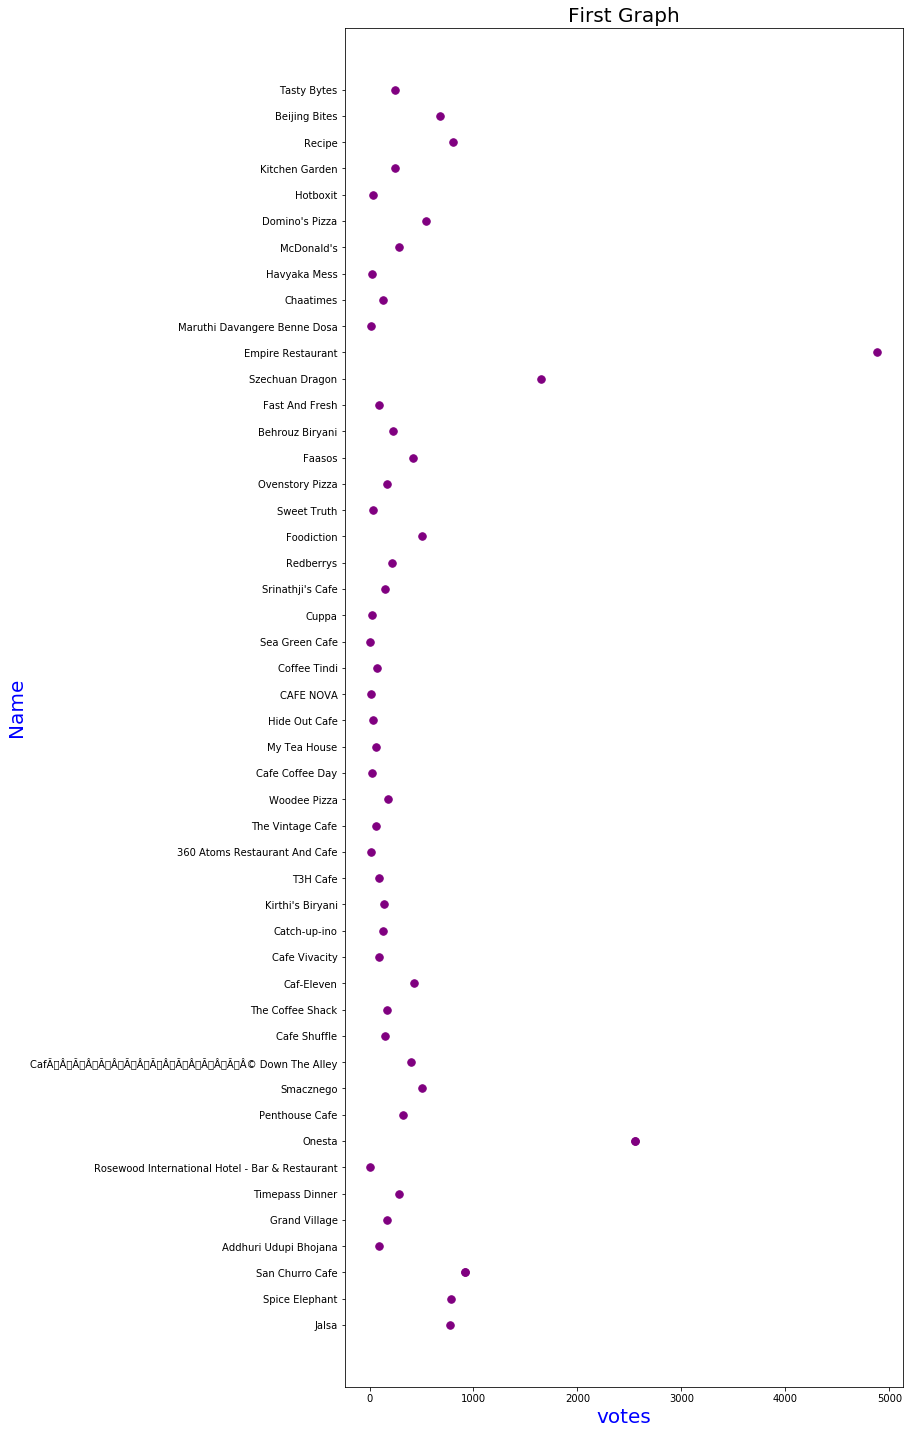

In [38]:
y=data["votes"].head(50)
x=data["name"].head(50)
plt.figure(figsize=(10,25))
plt.plot(y,x,c='Purple',marker=".",markersize=15,linestyle="")
plt.title("First Graph",fontdict={"fontsize":20}) ### we can change the font style aslo here usinng "fontname" keyword 
plt.ylabel("Name",fontdict={"fontsize":20,"color":"blue"})
plt.xlabel("votes",fontdict={"fontsize":20,"color":"blue"})

### legend plt.figure(9,4) refers to scale of the graph
plt.show()


### Total number of restaurents which allow the customers to book a table before handed.

In [39]:
data.loc[data["book_table"]=="Yes"].count()[0]

6433

### Total number of restaurents which does not allow the customers to  book a table before handed.

In [40]:
data.loc[data["book_table"]=="No"].count()[0]

37100

### Lets plot the above details 

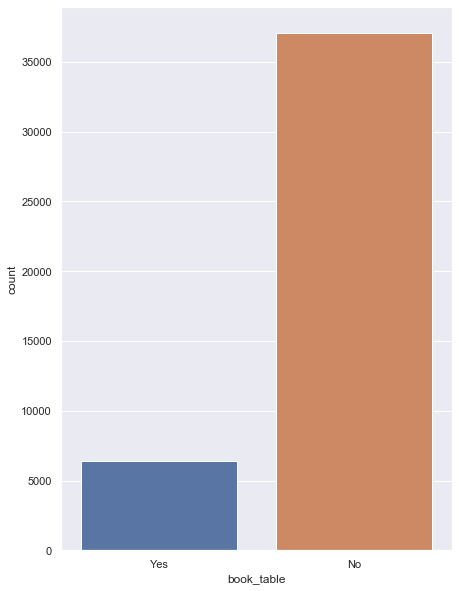

In [41]:
sns.set(rc={'figure.figsize':(7,10)})
sns.countplot(x=data['book_table'])

### Lets count the number of restaurents offering online order option 

In [42]:
data.loc[data["online_order"]=="Yes"].count()[0]


28202

In [43]:
data.loc[data["online_order"]=="No"].count()[0]

15331

### Plotting the above details into the pictorial form

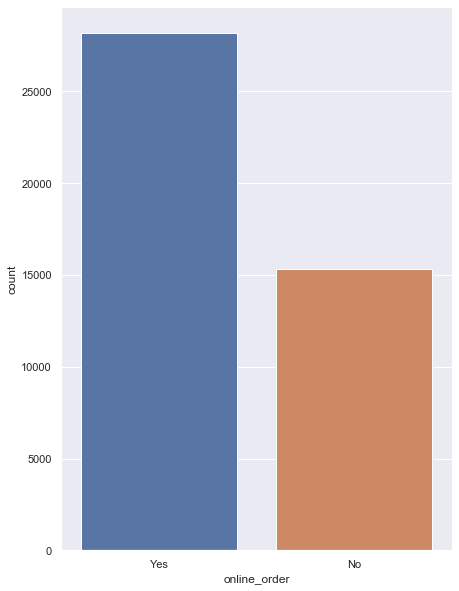

In [44]:
sns.set(rc={'figure.figsize':(7,10)})
sns.countplot(x=data['online_order'])

### Lets plot a Categorical plot between book table option and rating of a restaurent with listed_in(type) option as hue

<Figure size 1080x1224 with 0 Axes>

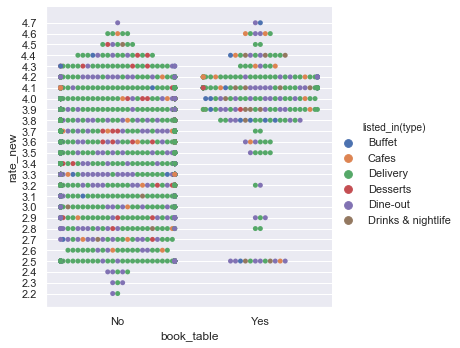

<Figure size 1080x1224 with 0 Axes>

In [45]:

sns.catplot(x="book_table",y="rate_new",data=data.head(2600),hue='listed_in(type)',order=["No", "Yes"],kind="swarm")
plt.figure(figsize=(15,17))


### Lets plot a Categorical plot between online order option and rating of a restaurent with book table option as hue

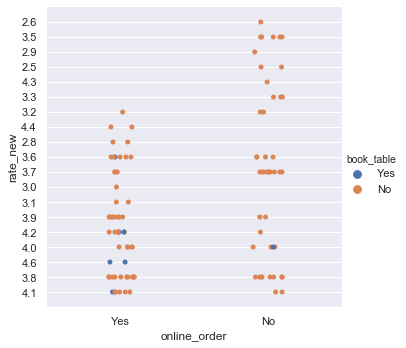

In [46]:
sns.catplot(x="online_order",y="rate_new",data=data.head(100),hue="book_table")

### plotting pie chart on the data of book table and checking the percentage

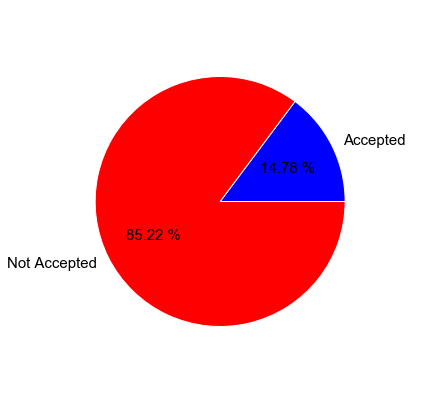

In [47]:
one=data.loc[data["book_table"]=="Yes"].count()[0]
two=data.loc[data["book_table"]=="No"].count()[0]
x=("Accepted",'Not Accepted')
explode=(0,0)

color=("blue",'red')
plt.pie((one,two),textprops={"color":'black',"fontsize":15},explode=explode,autopct="%.2f %%",labels=x,radius=0.8,colors=color)
plt.show()

### plotting pie chart on the data of onlie order and checking the percentage

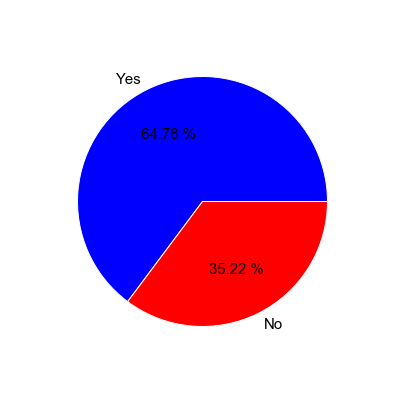

In [48]:
one=data.loc[data["online_order"]=="Yes"].count()[0]
two=data.loc[data["online_order"]=="No"].count()[0]
x=("Yes",'No')
explode=(0,0)

color=("blue",'red')
plt.pie((one,two),textprops={"color":'black',"fontsize":15},explode=explode,autopct="%.2f %%",labels=x,radius=0.8,colors=color)
plt.show()

### lets plot number of restaurents with respect to listed_in(type) column

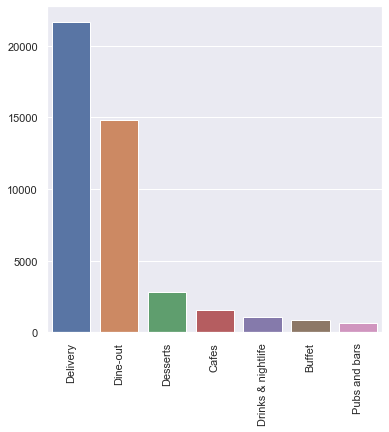

In [49]:
plt.figure(figsize = (6, 6))
index = data['listed_in(type)'].value_counts().index
values = data['listed_in(type)'].value_counts().values
g = sns.barplot(x = index, y = values, data = data)
g.set_xticklabels(labels = index, rotation = 90)
g

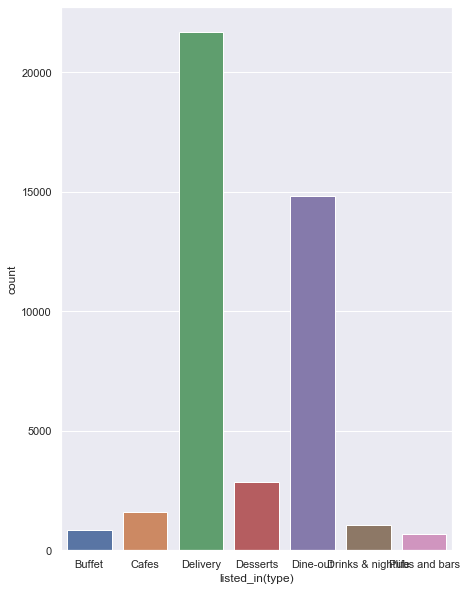

In [50]:
sns.countplot(x= data['listed_in(type)'])

### Lets plot number of restaurents with respect to the online order option with hue as listed_in(type) column

Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

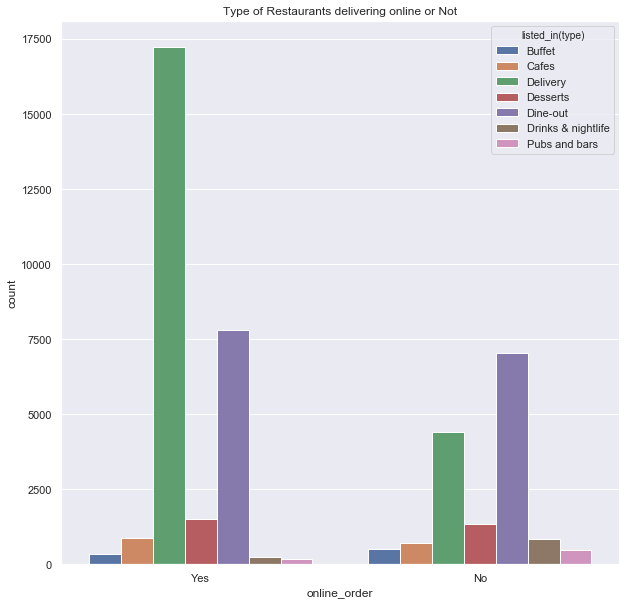

In [51]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x=data['online_order'], hue = data['listed_in(type)'])
fig = plt.gcf()
plt.title('Type of Restaurants delivering online or Not')


### Lets plot number of restaurents with respect to the listed_in(type) with hue as online order column

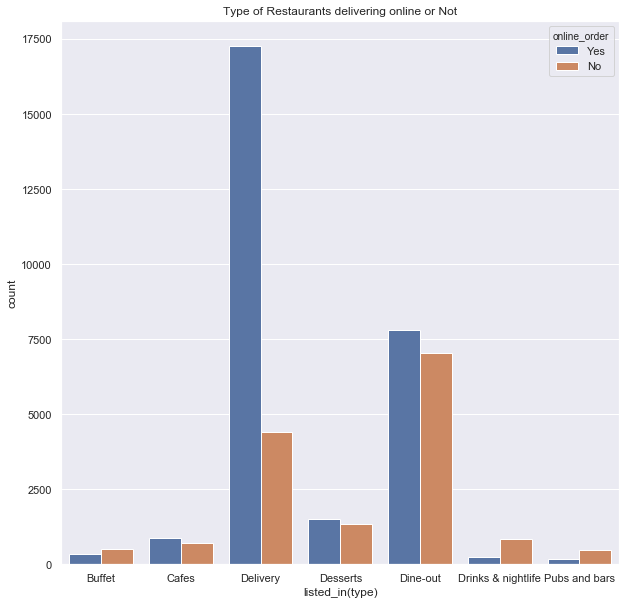

In [52]:
sns.countplot(x=data['listed_in(type)'], hue = data['online_order'])
fig = plt.gcf()
plt.title('Type of Restaurants delivering online or Not')
sns.set(rc={'figure.figsize':(10,10)})


### Lets plot pie chart on the column listed_in(type)

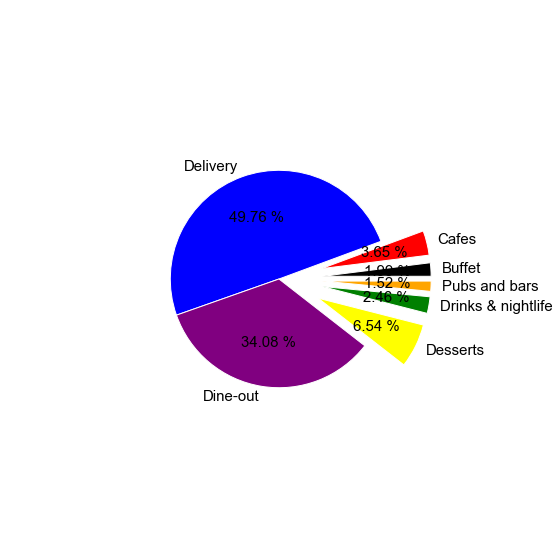

In [53]:
one=data.loc[data["listed_in(type)"]=='Buffet'].count()[0]
two=data.loc[data["listed_in(type)"]=='Cafes'].count()[0]
three=data.loc[data["listed_in(type)"]=='Delivery'].count()[0]
four=data.loc[data["listed_in(type)"]=='Desserts'].count()[0]
five=data.loc[data["listed_in(type)"]=='Dine-out'].count()[0]
six=data.loc[data["listed_in(type)"]=='Drinks & nightlife'].count()[0]
seven=data.loc[data["listed_in(type)"]=='Pubs and bars'].count()[0]

x=('Buffet','Cafes','Delivery','Dine-out','Desserts','Drinks & nightlife','Pubs and bars')
explode=(0.2,0.2,0,0,0.2,0.2,0.2)
y=('one','two','three','four')
color=('black','red','blue','purple','yellow','green','orange')
plt.pie((one,two,three,five,four,six,seven),textprops={"color":"black","fontsize":15},explode=explode,autopct="%.2f %%",labels=x,radius=0.5,colors=color)
plt.show()

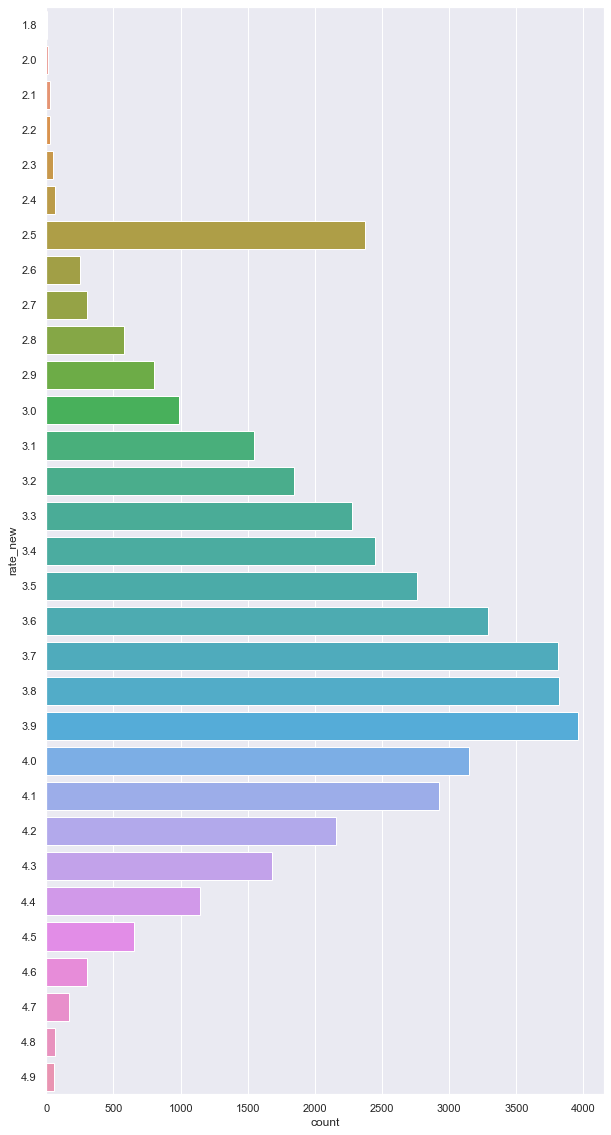

In [54]:
sns.set(rc={'figure.figsize':(10,20)})
sns.countplot(y=data['rate_new'])

## Restaurents with maximum number of outlets inn whole banglore city 

In [55]:
data['name'].value_counts().head(60)

Cafe Coffee Day                89
Onesta                         85
Empire Restaurant              71
Just Bake                      68
Five Star Chicken              68
Kanti Sweets                   68
Petoo                          64
Baskin Robbins                 63
Pizza Hut                      62
Polar Bear                     61
Domino's Pizza                 60
Sweet Truth                    60
Beijing Bites                  60
KFC                            60
Subway                         59
McDonald's                     59
Smoor                          59
Faasos                         57
Burger King                    55
Keventers                      54
Smally's Resto Cafe            54
Tata Cha                       52
Lakeview Milkbar               52
Corner House Ice Cream         52
Ambur Hot Dum Biryani          51
Rolls On Wheels                51
Frozen Bottle                  51
Pizza Stop                     50
Chung Wah                      50
A2B - Adyar An

### plotting restaurants with highest order outlets

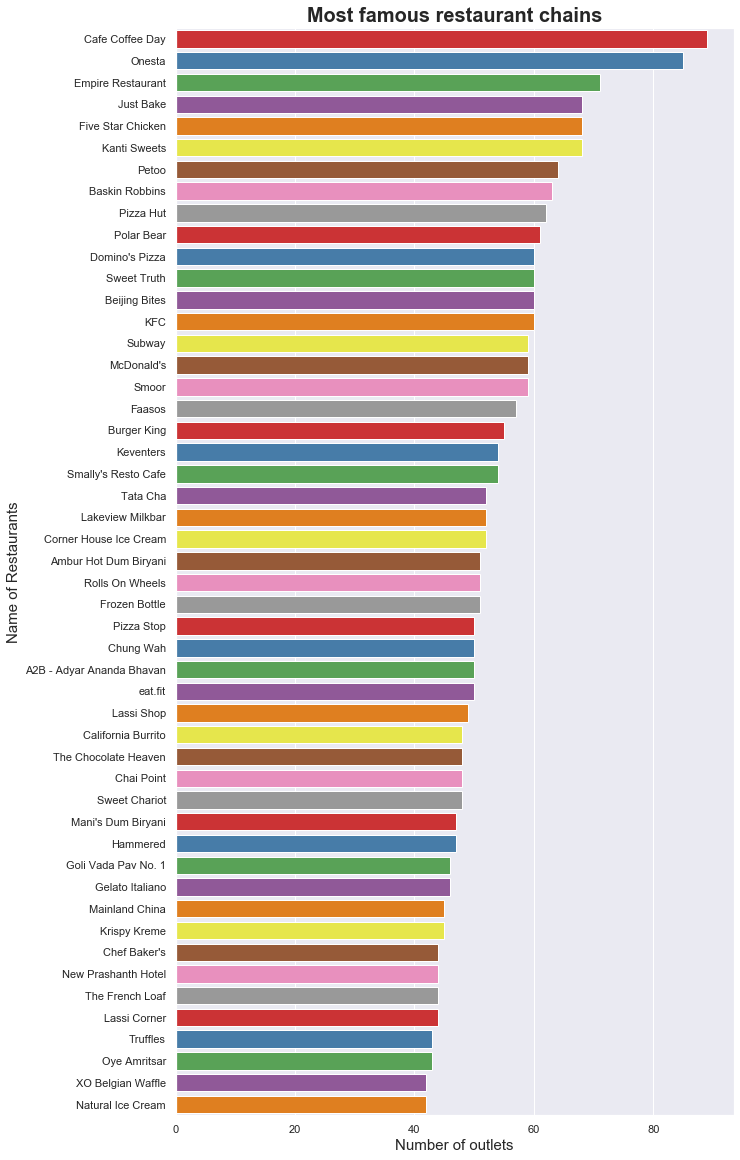

In [56]:
plt.figure(figsize=(10,20))
chains = data['name'].value_counts()[:50]
sns.barplot(x=chains, y=chains.index, palette='Set1')
plt.xlabel("Number of outlets", size=15)
plt.ylabel("Name of Restaurants", size=15)
plt.title("Most famous restaurant chains", fontsize=20, fontweight='bold')
plt.show()

In [57]:
data["table_book"]=data['book_table']
data['book_table'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
data

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S,table_book
0,Jalsa,Yes,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.1,"[North Indian, Mughlai, Chinese]",Yes
1,Spice Elephant,Yes,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,4.1,"[Chinese, North Indian, Thai]",No
2,San Churro Cafe,Yes,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.8,"[Cafe, Mexican, Italian]",No
3,Addhuri Udupi Bhojana,No,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.7,"[South Indian, North Indian]",No
4,Grand Village,No,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.8,"[North Indian, Rajasthani]",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,0,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield,3.7,"[North Indian, Continental]",No
51711,Bhagini,No,0,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield,2.5,"[Andhra, South Indian, Chinese, North Indian]",No
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,0,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield,3.6,[Continental],No
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,1,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield,4.3,[Finger Food],Yes


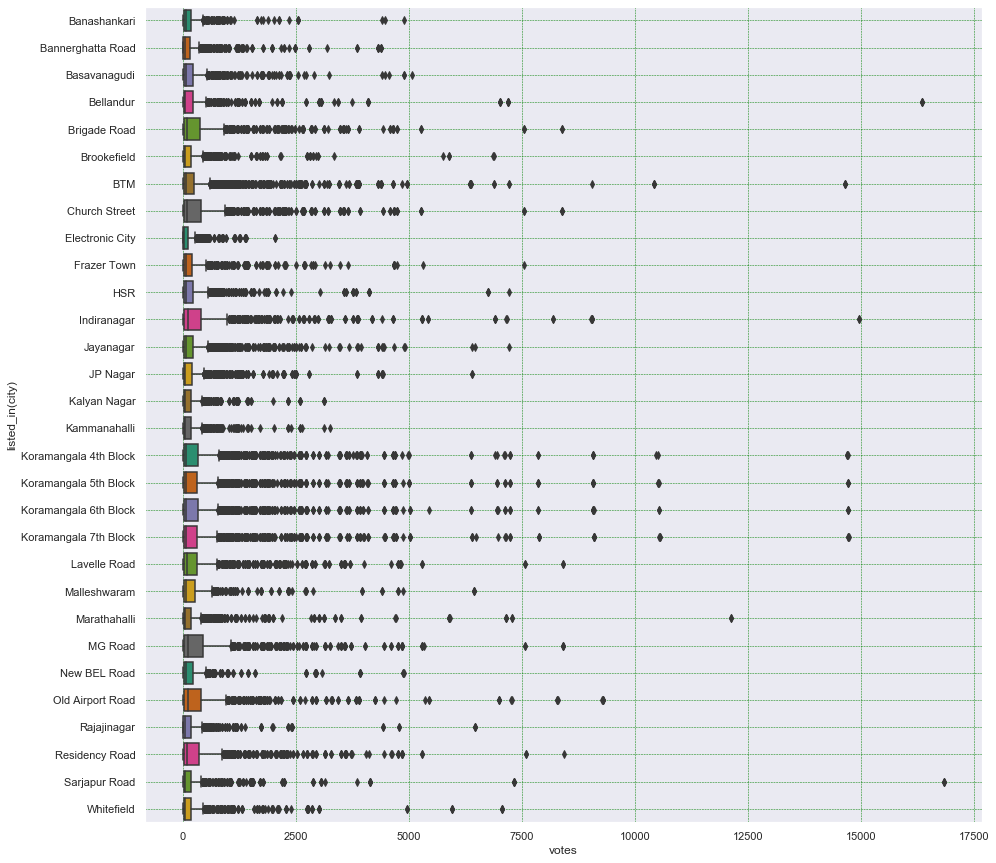

In [58]:
plt.figure(figsize=(15,15))

sns.boxplot(x='votes',y='listed_in(city)',data=data,palette='Dark2')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

In [59]:
li=[]
len=0
li.append(data["listed_in(city)"].unique())
li

[array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
        'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
        'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
        'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
        'Koramangala 4th Block', 'Koramangala 5th Block',
        'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
        'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
        'Old Airport Road', 'Rajajinagar', 'Residency Road',
        'Sarjapur Road', 'Whitefield'], dtype=object)]

In [60]:
lis=[]
len=0
lis.append(data["location"].unique())
lis

[array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
        'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
        'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
        'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
        'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
        'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
        'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
        'Sarjapur Road', 'Whitefield', 'East Bangalore',
        'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
        'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
        'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
        'Infantry Road', 'St. Marks Road', 'Cunningham Road',
        'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
        'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
        'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
  

### lets check the data which has different values in location column and listed_in(type)

In [61]:
data[data["location"]!=data["listed_in(city)"]]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rate_new,S,table_book
4,Grand Village,No,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.8,"[North Indian, Rajasthani]",No
5,Timepass Dinner,Yes,0,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari,3.8,[North Indian],No
6,Rosewood International Hotel - Bar & Restaurant,No,0,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari,3.6,"[North Indian, South Indian, Andhra, Chinese]",No
29,Srinathji's Cafe,No,0,3.8,148,Basavanagudi,"Casual Dining, Cafe","North Indian, Cafe, Chinese, Fast Food",550,Cafes,Banashankari,3.8,"[North Indian, Cafe, Chinese, Fast Food]",No
30,Redberrys,Yes,0,4.0,219,Basavanagudi,Cafe,"Cafe, Italian",600,Cafes,Banashankari,4.0,"[Cafe, Italian]",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,Punjabi Charchay,No,0,3.6,31,KR Puram,Quick Bites,"North Indian, Chinese",400,Dine-out,Whitefield,3.6,"[North Indian, Chinese]",No
51645,Raapchick,Yes,0,3.6,49,Brookefield,Quick Bites,"Fast Food, Burger",300,Dine-out,Whitefield,3.6,"[Fast Food, Burger]",No
51681,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,1,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Drinks & nightlife,Whitefield,4.3,[Finger Food],Yes
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,1,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield,4.3,[Finger Food],Yes


### Therefore with the above data we can understand that in location column shows landmarks whereas listed_in(city) column gives the sub location

## Lets plot location and number of restaurents 

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text xticklabel objects>)

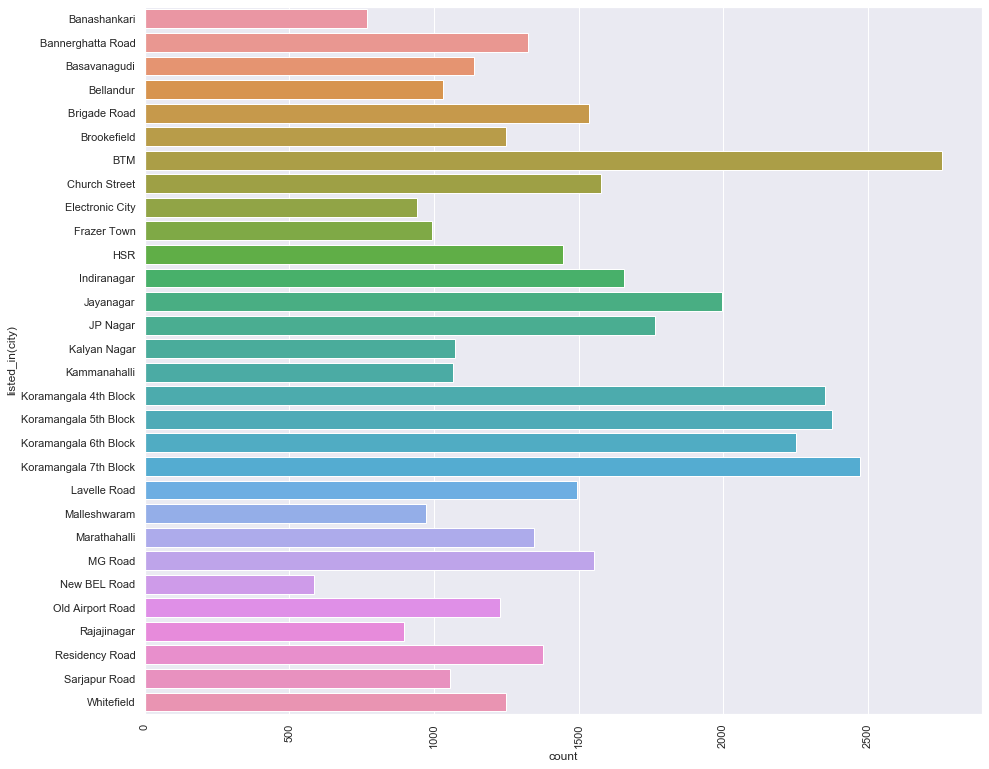

In [62]:
plt.figure(figsize =(15,13))
ax = sns.countplot(y=data['listed_in(city)'])
plt.xticks(rotation = 90)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text xticklabel objects>)

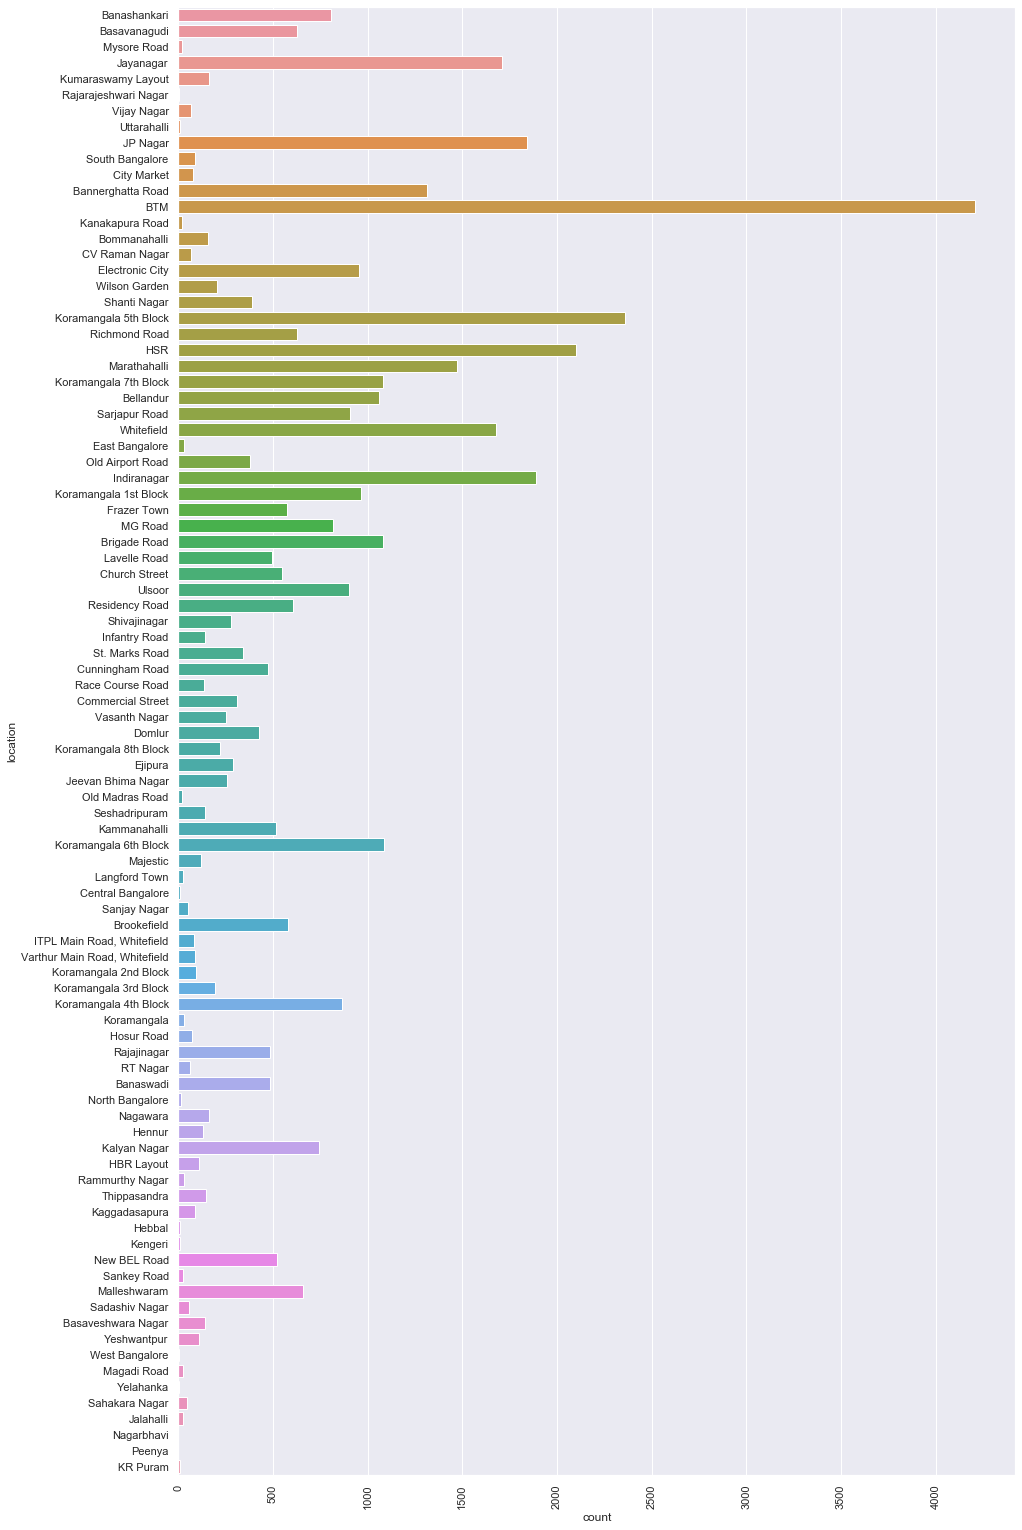

In [63]:
plt.figure(figsize =(15,27))
ax = sns.countplot(y=data['location'])
plt.xticks(rotation = 90)

## Lets find 5 location in banglore city whch has most no of hotels 

In [64]:
data['listed_in(city)'].value_counts().head(5)

BTM                      2757
Koramangala 7th Block    2475
Koramangala 5th Block    2377
Koramangala 4th Block    2354
Koramangala 6th Block    2253
Name: listed_in(city), dtype: int64

In [65]:
data['location'].value_counts().head(5)


BTM                      4210
Koramangala 5th Block    2358
HSR                      2102
Indiranagar              1889
JP Nagar                 1842
Name: location, dtype: int64

## Lets find 5 location in banglore city which has least no of hotels

In [66]:
data['listed_in(city)'].value_counts().tail(5)

Malleshwaram       974
Electronic City    940
Rajajinagar        895
Banashankari       767
New BEL Road       584
Name: listed_in(city), dtype: int64

In [67]:
data['location'].value_counts().tail(5)

West Bangalore          5
Yelahanka               4
Rajarajeshwari Nagar    2
Peenya                  1
Nagarbhavi              1
Name: location, dtype: int64

## Lets plot location and number of restaurents with online order option as hue

Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

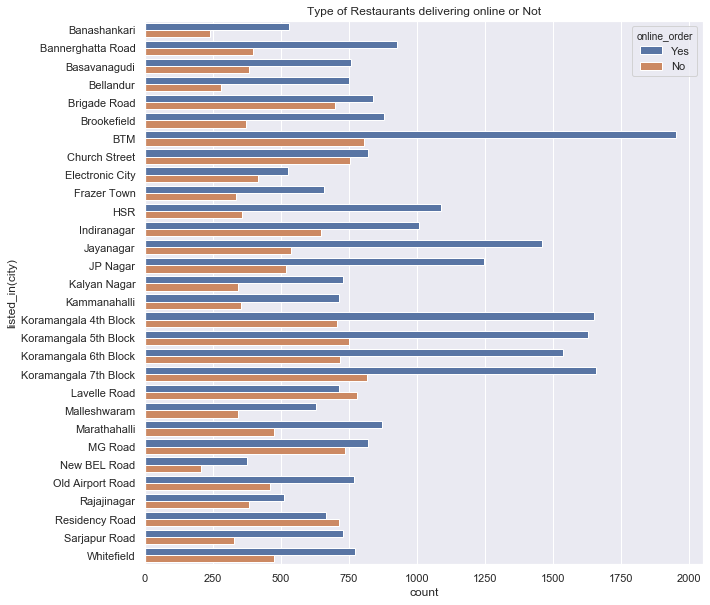

In [68]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y=data['listed_in(city)'], hue =data['online_order'] )
plt.title('Type of Restaurants delivering online or Not')



Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

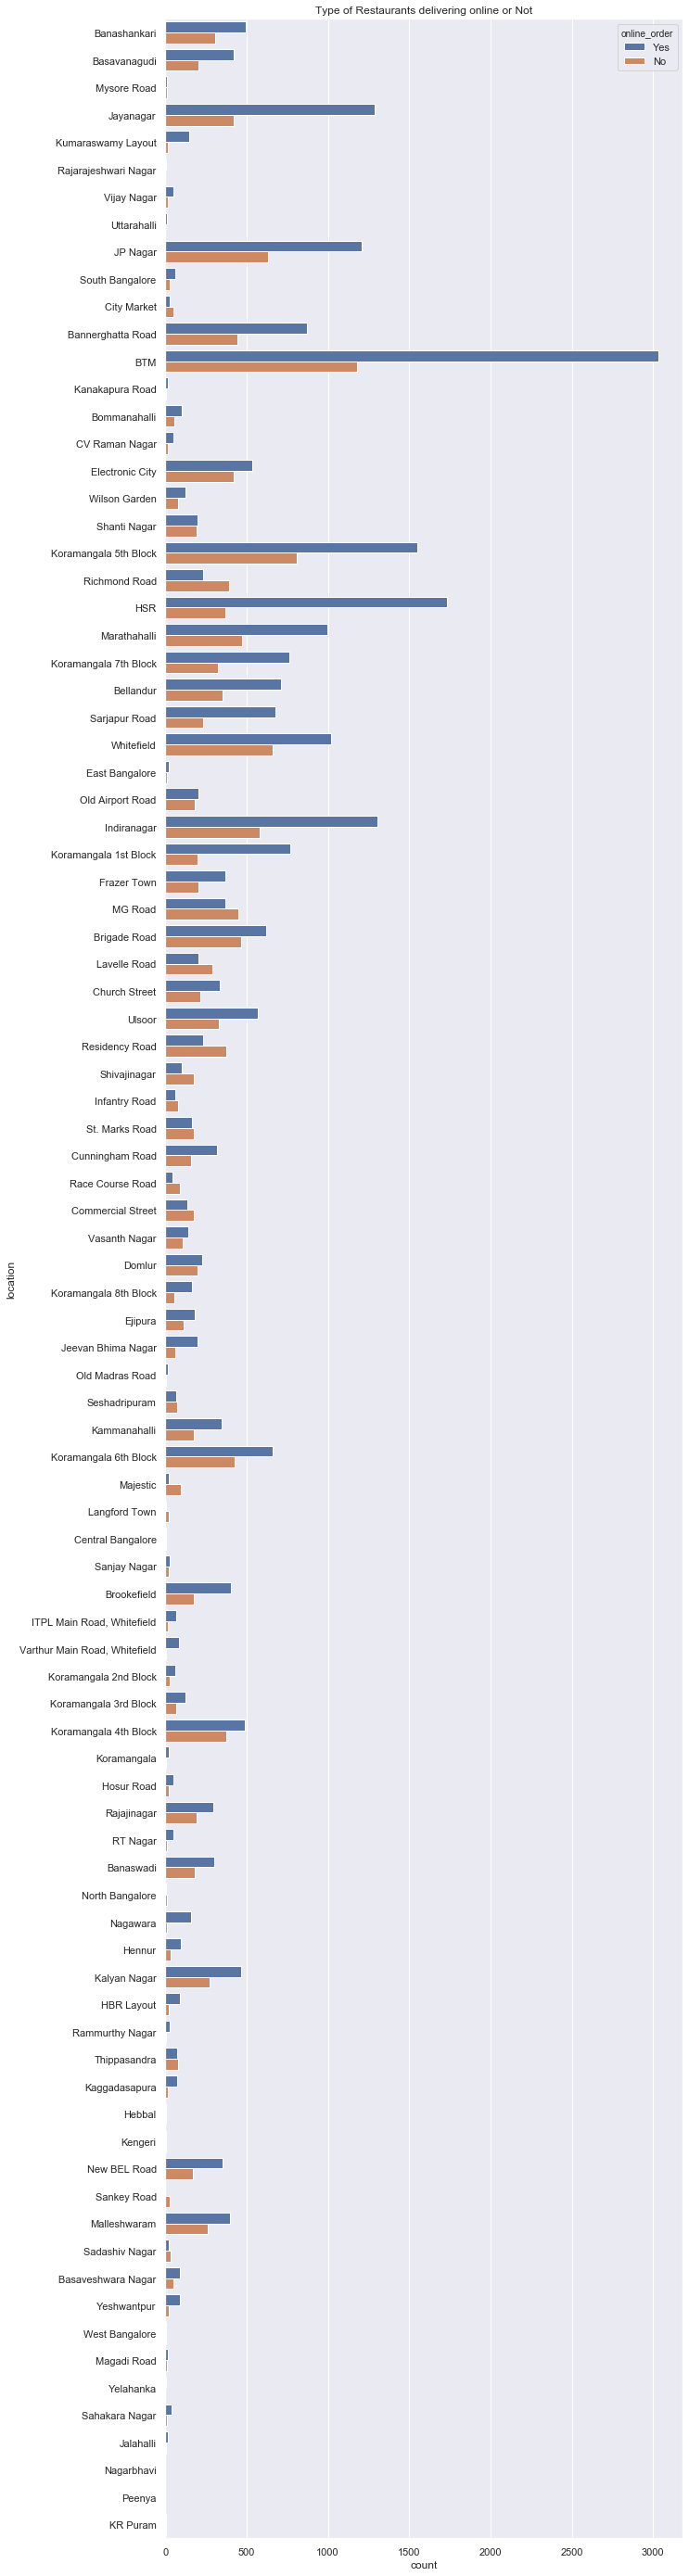

In [69]:
sns.set(rc={'figure.figsize':(10,50)})
sns.countplot(y=data['location'], hue =data['online_order'] )
plt.title('Type of Restaurants delivering online or Not')



## Lets plot location and number of restaurents with book table option as hue

Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

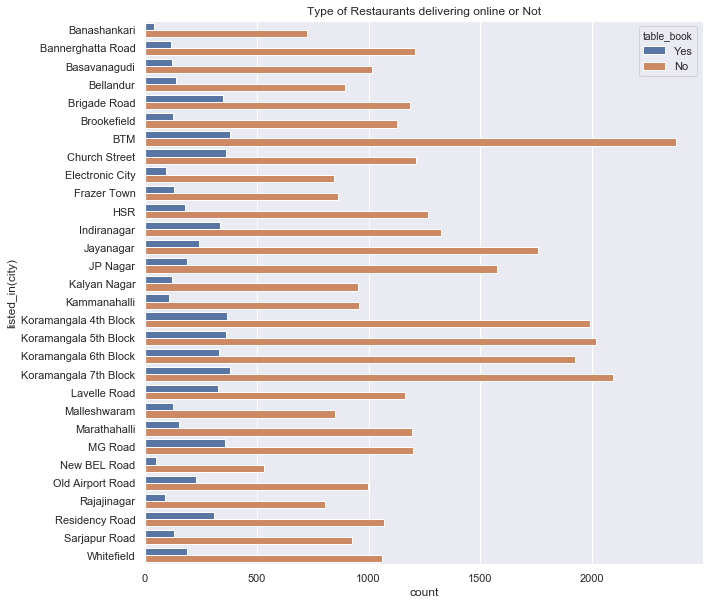

In [70]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y=data['listed_in(city)'], hue =data['table_book'] )
plt.title('Type of Restaurants delivering online or Not')


Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

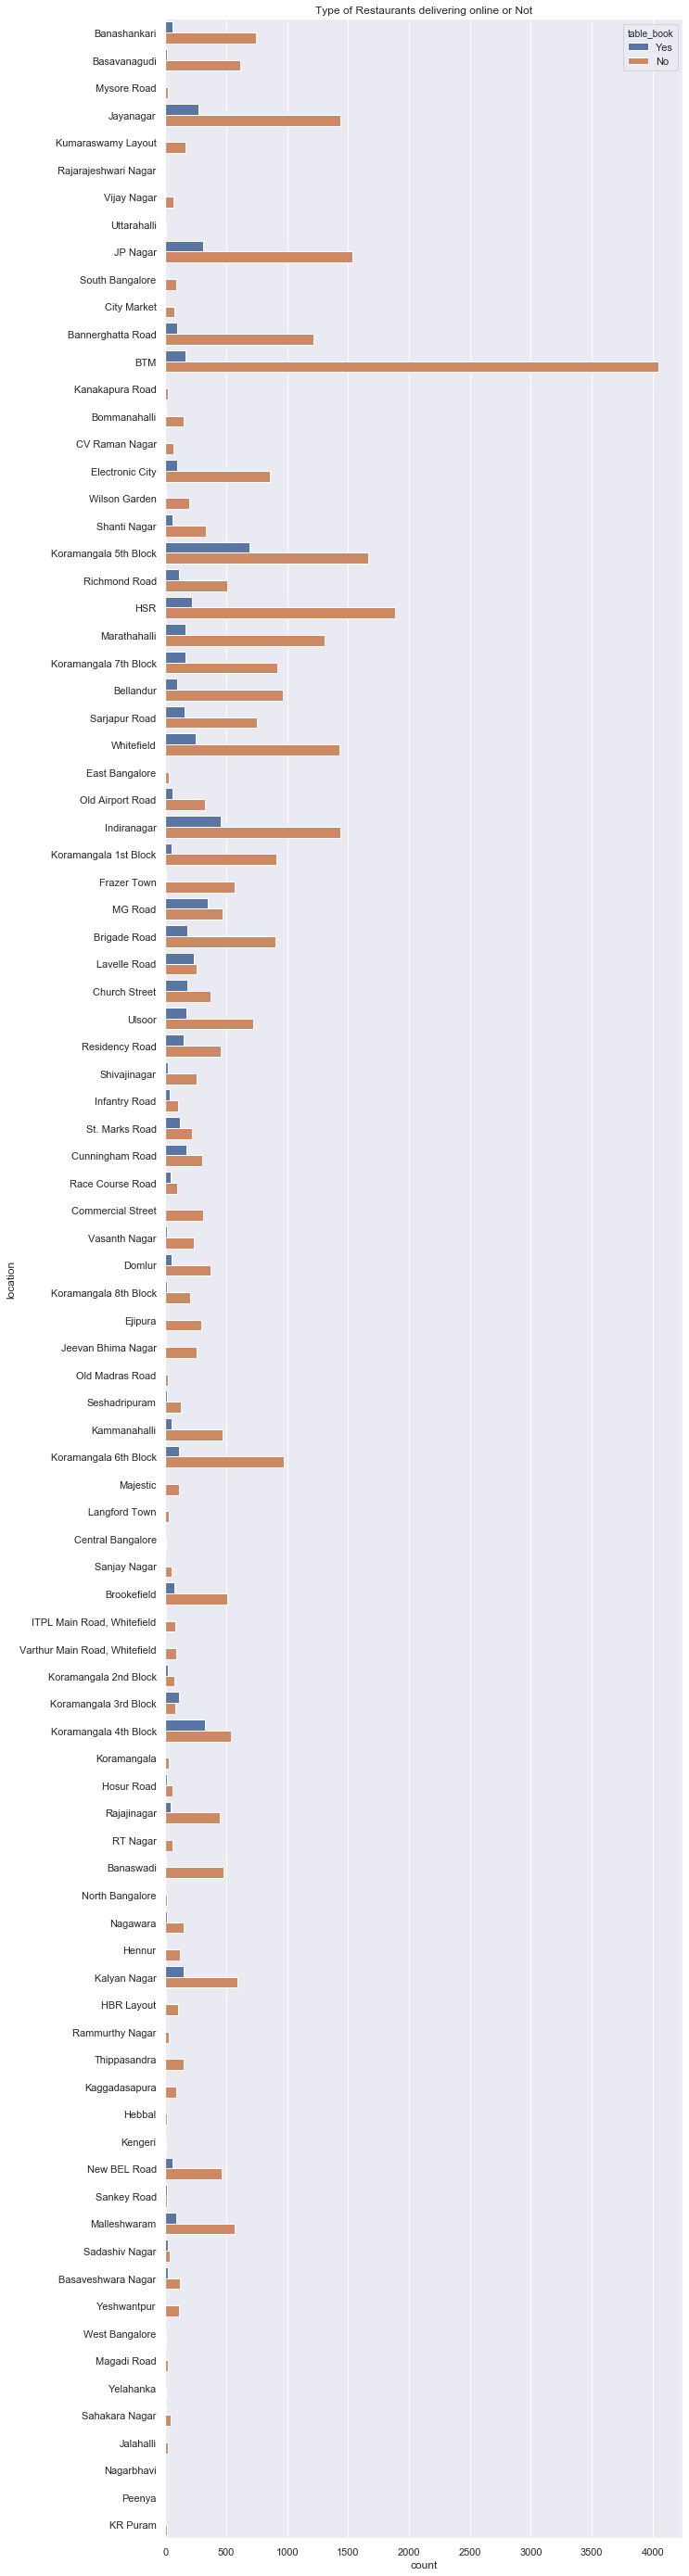

In [71]:
sns.set(rc={'figure.figsize':(10,50)})
sns.countplot(y=data['location'], hue =data['table_book'] )
plt.title('Type of Restaurants delivering online or Not')


### The End
